In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler , LabelEncoder
from imblearn . over_sampling import SMOTE

In [2]:
df = pd.read_csv("New-Zealand-and-district-health-board-period-life-tables-2017-2019-by-NZDep2018-CSV (1).csv")
df.head()

,measure,quantile,NZDep2018,sex,age,area,geography,value
0,lx,2.50%,decile_1,Female,0 years,00 New Zealand,New Zealand,100000.0
1,lx,2.50%,decile_1,Female,1-4 years,00 New Zealand,New Zealand,99664.0
2,lx,2.50%,decile_1,Female,5-9 years,00 New Zealand,New Zealand,99615.0
3,lx,2.50%,decile_1,Female,10-14 years,00 New Zealand,New Zealand,99587.0
4,lx,2.50%,decile_1,Female,15-19 years,00 New Zealand,New Zealand,99554.0


In [3]:
df.shape

(92400, 8)

In [4]:
#df["Purchase Amount (USD)"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92400 entries, 0 to 92399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measure    92400 non-null  object 
 1   quantile   92400 non-null  object 
 2   NZDep2018  92400 non-null  object 
 3   sex        92400 non-null  object 
 4   age        92400 non-null  object 
 5   area       92400 non-null  object 
 6   geography  92400 non-null  object 
 7   value      92400 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.6+ MB


In [5]:
# check for duplicate rows in dataset
duplicate_rows = df[df.duplicated(keep=False)]
print(f"duplicate rows is :", duplicate_rows.shape )
duplicate_rows

duplicate rows is : (0, 8)


,measure,quantile,NZDep2018,sex,age,area,geography,value


In [6]:
# Check for duplicate columns 
duplicate_columns = df.columns.duplicated()
print(f"No duplicate columns in dataset :", duplicate_columns)

No duplicate columns in dataset : [False False False False False False False False]


In [7]:
# Handle duplicate,missing values, and inconsistencies.
print(f"\ndf Cleaned. Shape before cleaning: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"\ndf Cleaned. Shape after cleaning: {df.shape}")


df Cleaned. Shape before cleaning: (92400, 8)

df Cleaned. Shape after cleaning: (92400, 8)


In [8]:
#checking for missing values
df.isna().sum()

measure      0
quantile     0
NZDep2018    0
sex          0
age          0
area         0
geography    0
value        0
dtype: int64

In [9]:
df.head(3)

,measure,quantile,NZDep2018,sex,age,area,geography,value
0,lx,2.50%,decile_1,Female,0 years,00 New Zealand,New Zealand,100000.0
1,lx,2.50%,decile_1,Female,1-4 years,00 New Zealand,New Zealand,99664.0
2,lx,2.50%,decile_1,Female,5-9 years,00 New Zealand,New Zealand,99615.0


In [10]:
df.columns

Index(['measure', 'quantile', 'NZDep2018', 'sex', 'age', 'area', 'geography',
       'value'],
      dtype='object')

In [11]:
# filling missing values
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\2870458251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,measure,quantile,NZDep2018,sex,age,area,geography,value
0,lx,2.50%,decile_1,Female,0 years,00 New Zealand,New Zealand,100000.0
1,lx,2.50%,decile_1,Female,1-4 years,00 New Zealand,New Zealand,99664.0
2,lx,2.50%,decile_1,Female,5-9 years,00 New Zealand,New Zealand,99615.0
3,lx,2.50%,decile_1,Female,10-14 years,00 New Zealand,New Zealand,99587.0
4,lx,2.50%,decile_1,Female,15-19 years,00 New Zealand,New Zealand,99554.0


In [12]:
# checking for missing values
df.isna().sum()

measure      0
quantile     0
NZDep2018    0
sex          0
age          0
area         0
geography    0
value        0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
value,92400.0,71777.739587,148806.102367,0.0,0.093482,38.15,86930.25,535512.0


In [14]:
df.nunique()

measure          7
quantile         3
NZDep2018       15
sex              2
age             21
area            21
geography        2
value        44373
dtype: int64

In [15]:
df["sex"].value_counts()

sex
Female    46200
Male      46200
Name: count, dtype: int64

In [16]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df.head(5)

,measure,quantile,NZDep2018,sex,age,area,geography,value
0,lx,2.50%,decile_1,Female,0 years,00 New Zealand,New Zealand,100000.0
1,lx,2.50%,decile_1,Female,1-4 years,00 New Zealand,New Zealand,99664.0
2,lx,2.50%,decile_1,Female,5-9 years,00 New Zealand,New Zealand,99615.0
3,lx,2.50%,decile_1,Female,10-14 years,00 New Zealand,New Zealand,99587.0
4,lx,2.50%,decile_1,Female,15-19 years,00 New Zealand,New Zealand,99554.0


In [18]:
df.groupby("sex")[["area" ,"age"]].sum().sort_values(by ="area", ascending= True)

,area,age
sex,,
Female,00 New Zealand00 New Zealand00 New Zealand00 N...,0 years1-4 years5-9 years10-14 years15-19 year...
Male,00 New Zealand00 New Zealand00 New Zealand00 N...,0 years1-4 years5-9 years10-14 years15-19 year...


In [19]:
df.groupby(["quantile"])["value"].sum().sort_values(ascending = False).to_frame()

,value
quantile,
97.50%,2.245408e+09
50%,2.210494e+09
2.50%,2.176362e+09


<Axes: xlabel='quantile'>

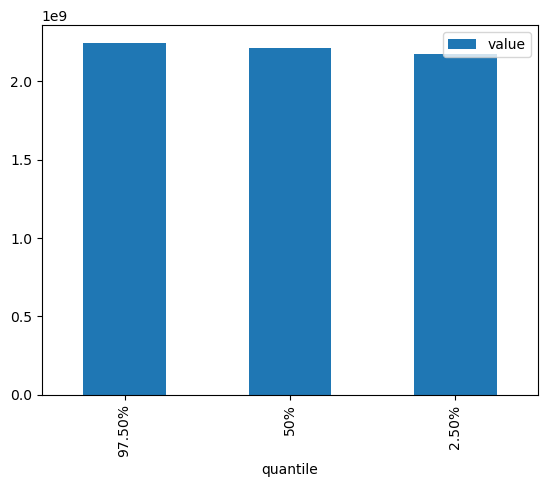

In [20]:
df.groupby(["quantile"])["value"].sum().sort_values(ascending = False).to_frame().plot(kind="bar")

In [21]:
df["quantile"].value_counts()

quantile
2.50%     30800
50%       30800
97.50%    30800
Name: count, dtype: int64

<Axes: xlabel='quantile'>

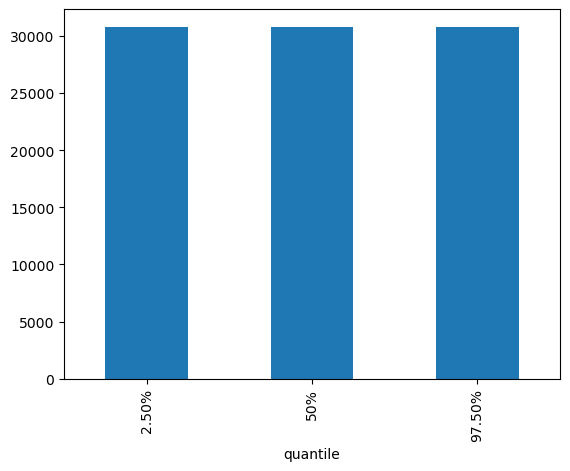

In [22]:
df["quantile"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

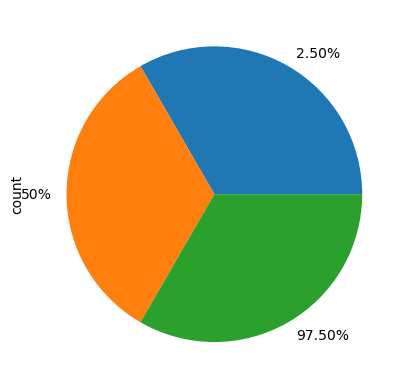

In [23]:
df["quantile"].value_counts().plot(kind="pie")

FOR DATA VISUALISATION

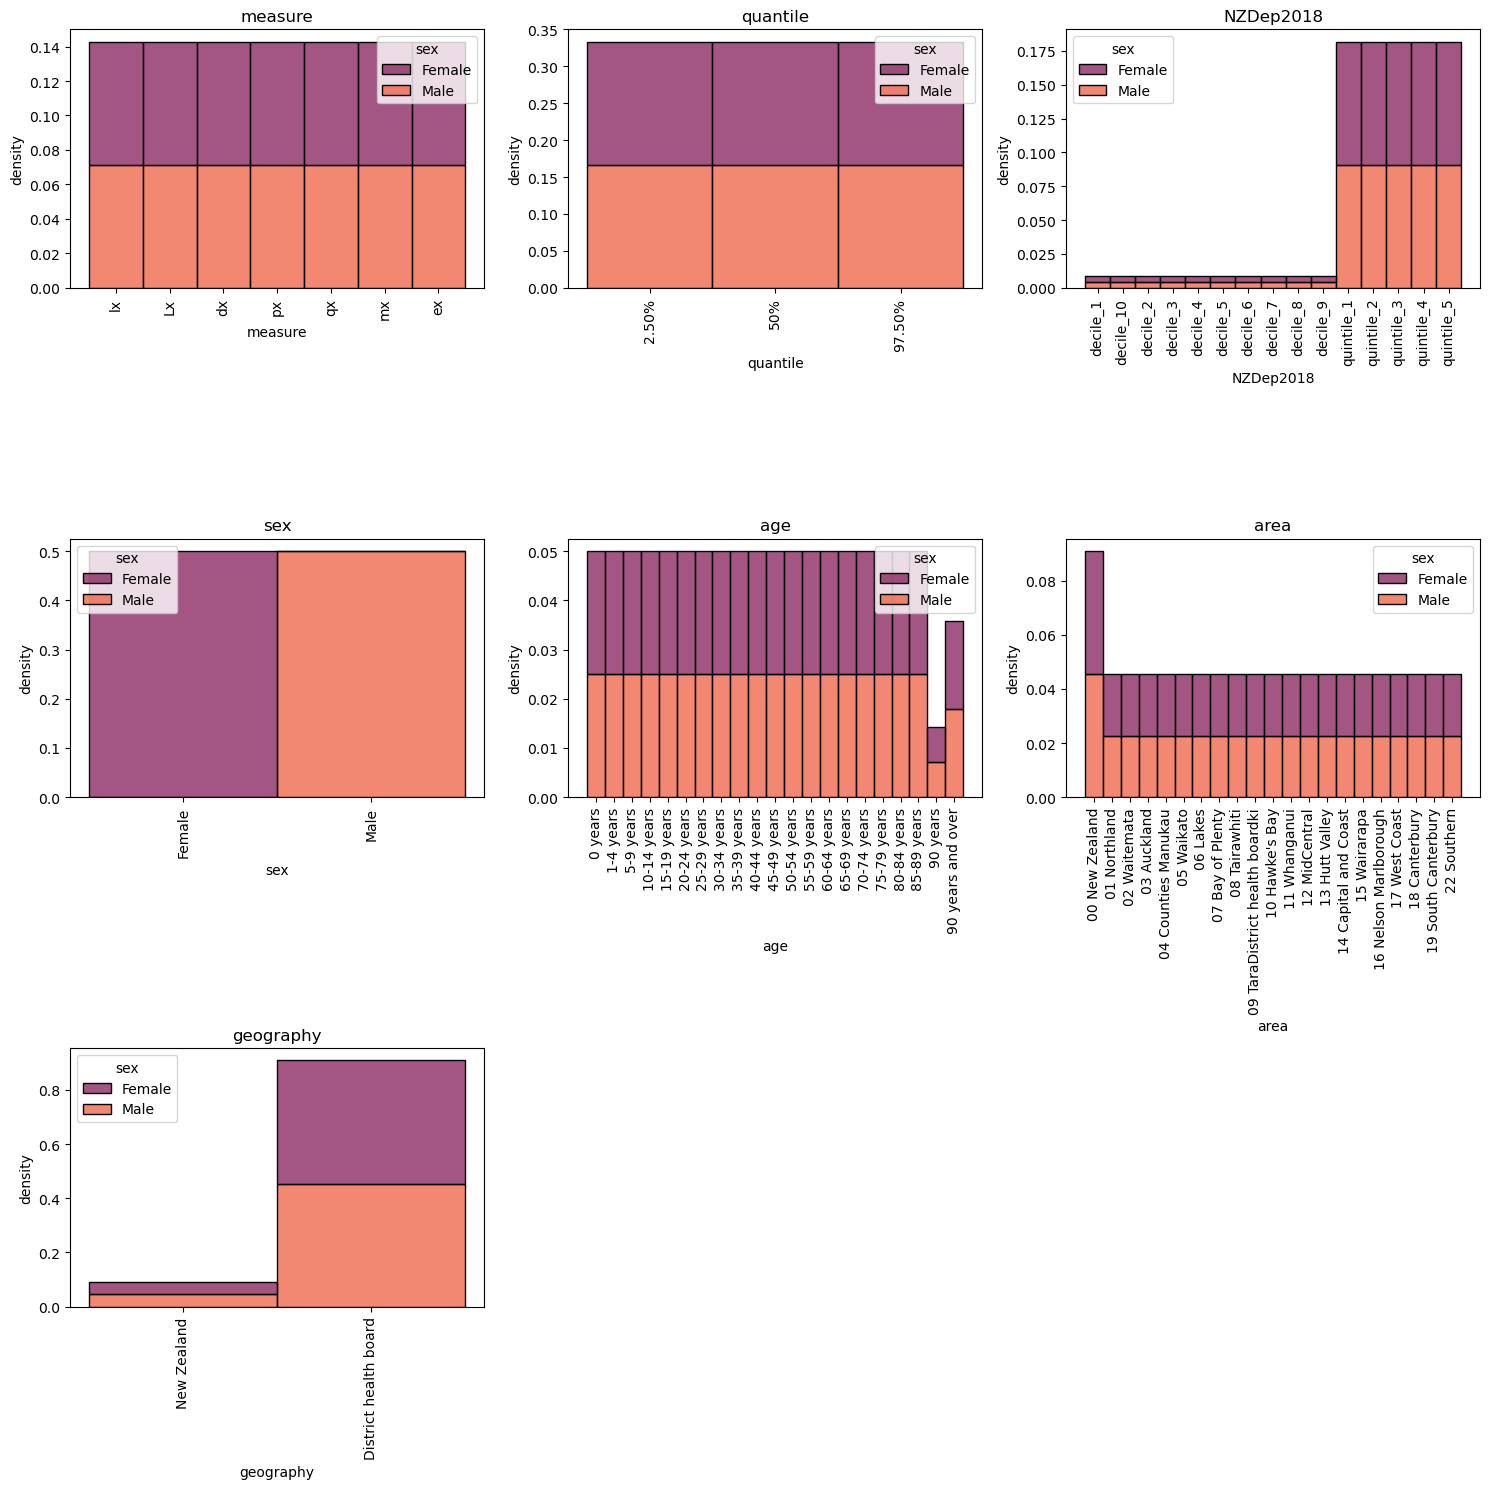

In [24]:
 # Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include="object").columns.tolist()

# Create the stacked density plot 

num_cols = len(cat_vars)

num_rows = (num_cols + 2) // 3

fig,axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars ):
    sns.histplot(data=df, x=var, hue="sex", stat="density", multiple ="stack", ax=axs[i],palette="rocket")
    axs[i].set_title(var)
    axs[i].set_ylabel("density")
    axs[i].tick_params(axis="x", rotation=90)
# Remove any extra empty subplots if needed
if num_cols <len (axs):
            for i in range(num_cols,len(axs)):
              fig.delaxes(axs[i])
                
# Adjust spacing between subplot 
fig .tight_layout()

# Show plot
plt.show()

In [25]:
school= 5+5
school

10

# second phase for floats

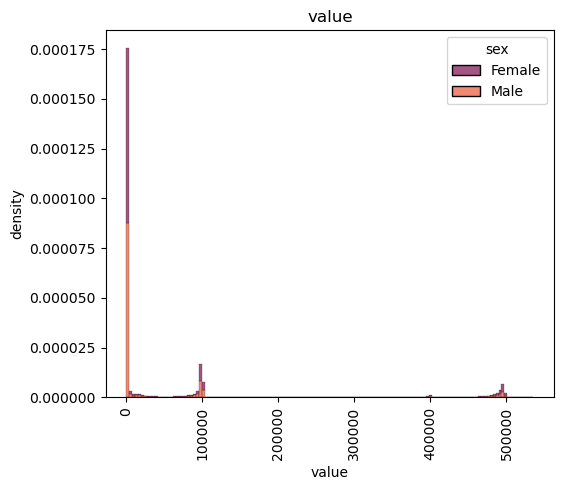

In [26]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include="float").columns.tolist()

# Create the stacked density plot 

num_cols = len(cat_vars)

num_rows = (num_cols + 2) // 3

fig,axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars ):
    sns.histplot(data=df, x=var, hue="sex", stat="density", multiple ="stack", ax=axs[i],palette="rocket")
    axs[i].set_title(var)
    axs[i].set_ylabel("density")
    axs[i].tick_params(axis="x", rotation=90)
# Remove any extra empty subplots if needed
if num_cols <len (axs):
            for i in range(num_cols,len(axs)):
              fig.delaxes(axs[i])
                
# Adjust spacing between subplot 
fig .tight_layout()

# Show plot
plt.show()

# getting the names of columns

# coverting categorical to binary numbers

In [27]:
for col in df.select_dtypes(include=["object"]).columns:    
# Print the columns name and the unique values 
   print(f"[col]: (df[col].unique())")

sex: ['Male','Female']
NZDep2018: ['quintile_1','quintile_2','quintile_3','quintile_4','quintile_5','decile_1','decile_10','decile_2',
            'decile_3','decile_4','decile_5','decile_6','decile_7','decile_8','decile_9']
quantile: ['2.50%','50%','97.50%']
measure: ['lx','Lx','dx','px','qx','mx','ex']
age: ['0 years','1-4 years','85-89 years','80-84 years','75-79 years','70-74 years','65-69 years','60-64 years',
      '55-59 years','50-54 years','45-49 years','40-44 years','35-39 years','30-34 years','25-29 years','20-24 years',
      '15-19 years','10-14 years','5-9 years','90 years and over','90 years']
area: ['00 New Zealand','11 Whanganui','19 South Canterbury','18 Canterbury','17 West Coast','16 Nelson Marlborough',
       '15 Wairarapa','14 Capital and Coast','13 Hutt Valley','12 MidCentral','10 Hawke s Bay','01 Northland',
       '09 TaraDistrict health boardki','08 Tairawhiti','07 Bay of Plenty','06 Lakes','05 Waikato','04 Counties Manukau',
       '03 Auckland','02 Waitemata','22 Southern']
geography: ['District health board','New Zealand']

from sklearn import preprocessing 
for col in df.select_dtypes(include=[ "object"]).columns:
           # Initialize a LabelEncoder object
           label_encoder = preprocessing.LabelEncoder()
           # Fit the encoder to the unique values in the column
           label_encoder.fit(df[col].unique())
           # Transform the column using the encoder 
           df[col] = label_encoder.transform(df[col])
           # Print the column name and the unique encoded values
           print(f"[col]: (df[col].unique())")

[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())
[col]: (df[col].unique())


# plotting the hitmap

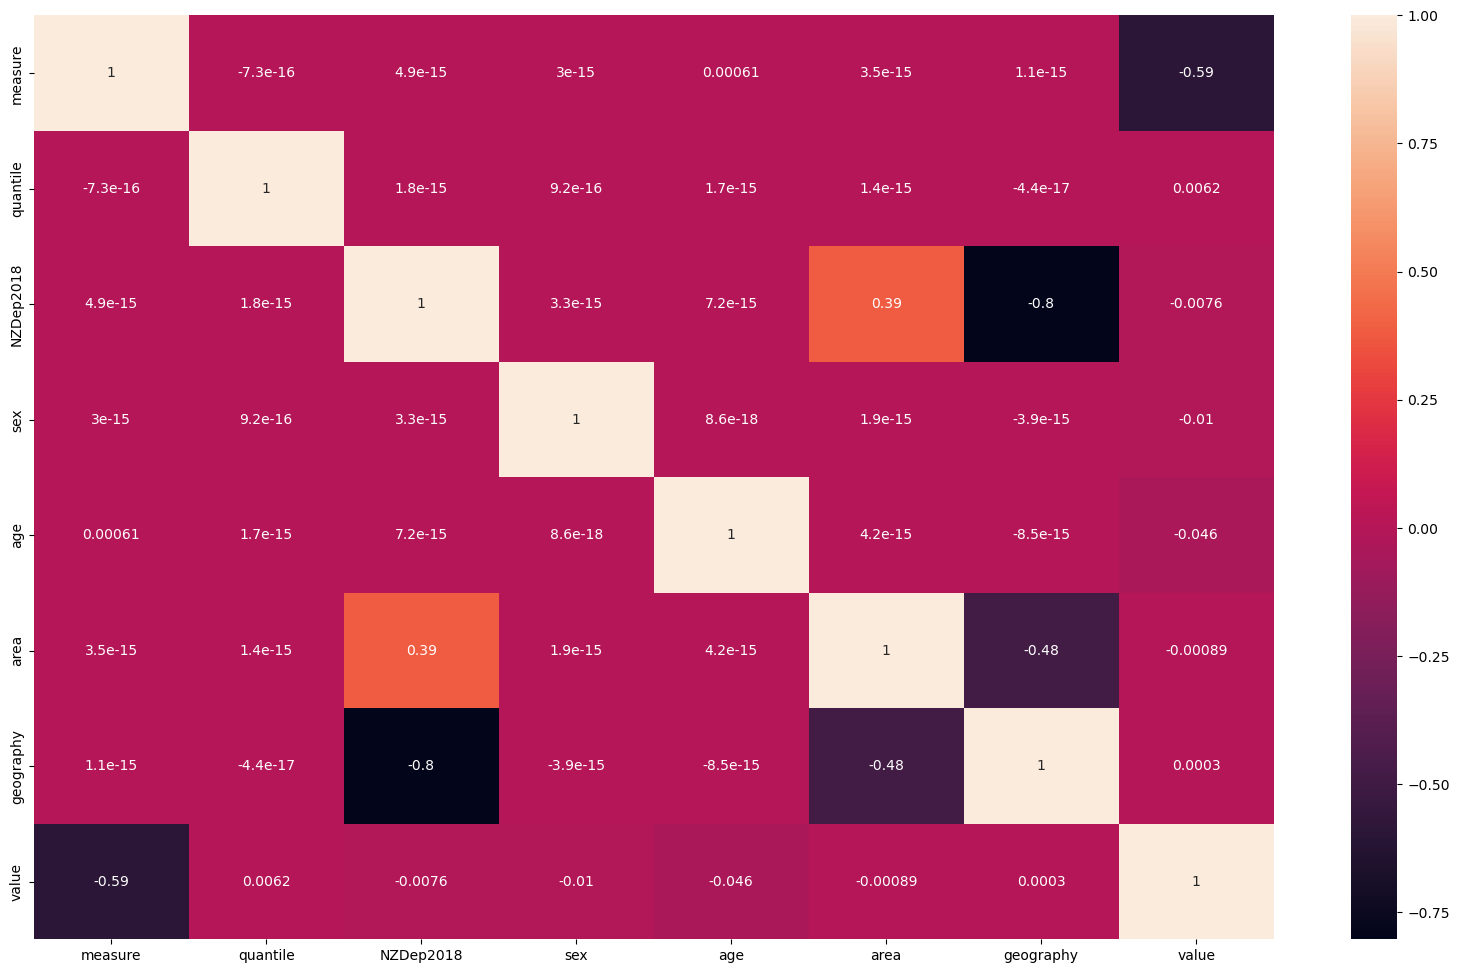

In [28]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),fmt=".2g", annot= True)
plt.show()

# using pairplot multivaraite chart to understand various distribution of each features

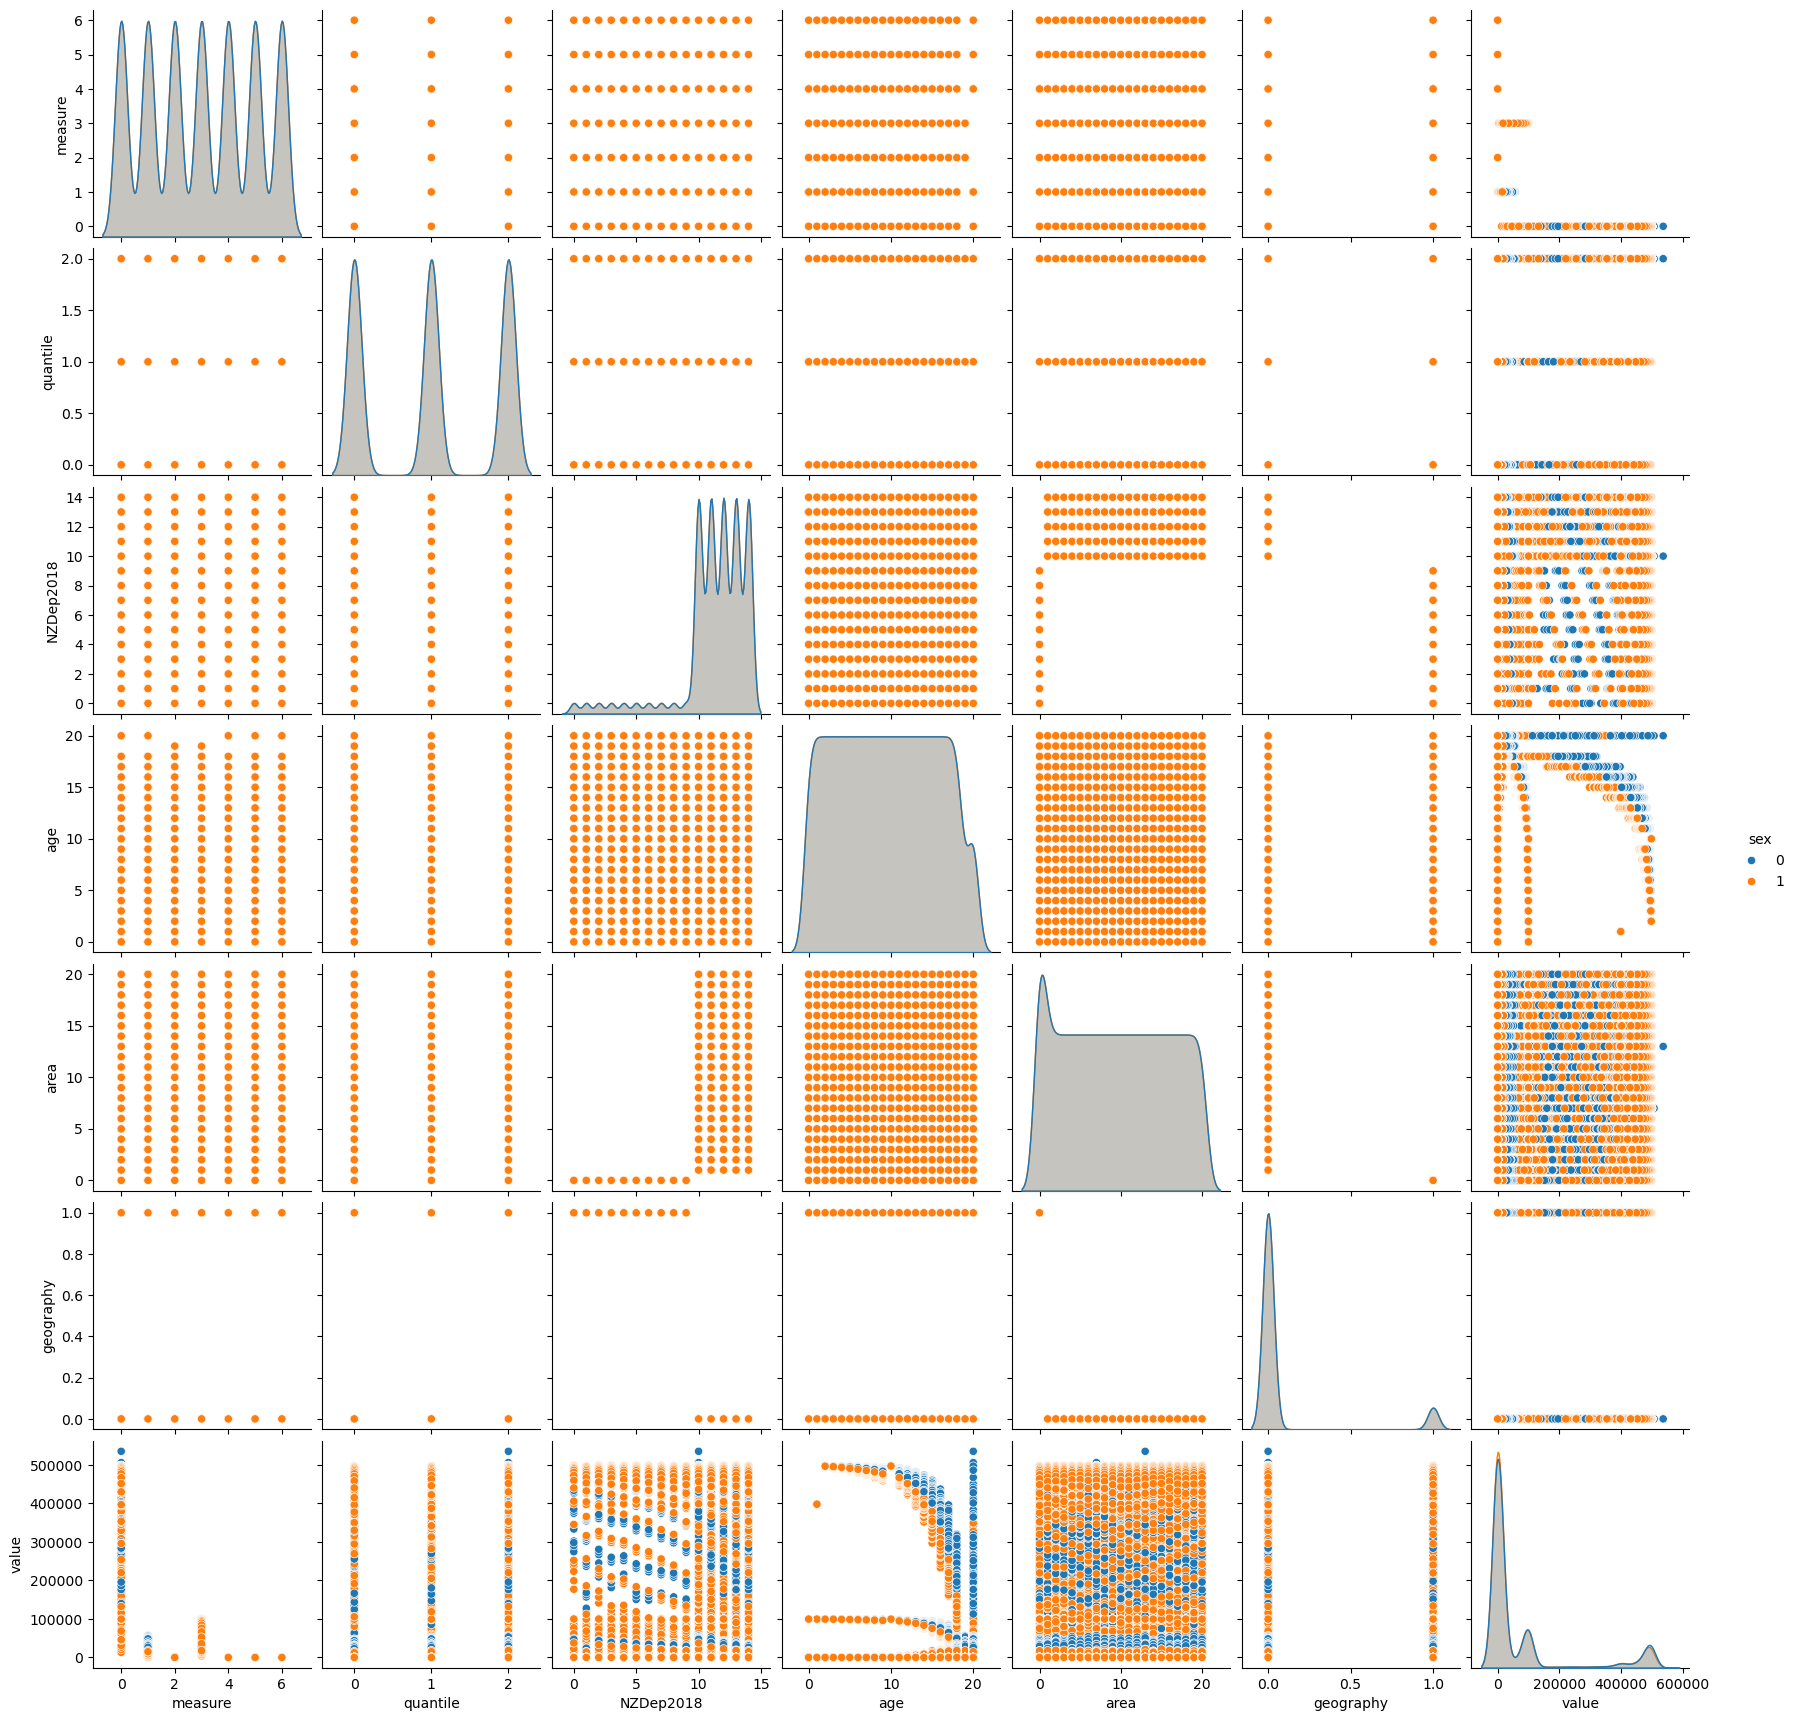

In [29]:
sns.pairplot(data=df, hue= "sex")
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92400 entries, 0 to 92399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measure    92400 non-null  int32  
 1   quantile   92400 non-null  int32  
 2   NZDep2018  92400 non-null  int32  
 3   sex        92400 non-null  int32  
 4   age        92400 non-null  int32  
 5   area       92400 non-null  int32  
 6   geography  92400 non-null  int32  
 7   value      92400 non-null  float64
dtypes: float64(1), int32(7)
memory usage: 3.2 MB


In [31]:
df.head(1)

,measure,quantile,NZDep2018,sex,age,area,geography,value
0,3,0,0,0,0,0,1,100000.0


# MACHINE LEARNING 

In [32]:
from sklearn .model_selection import train_test_split
X = df.drop("sex",axis = 1)
y= df["sex"]
# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [33]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ["quantile"]
            
# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Handling outlier

In [34]:
# setting up a threshold for outlier detection 
threshold = 3

# finding the outlier based on the thresh hold
outlier_indices=np.where(z_scores>threshold)[0]
# removing the outliers from the training data
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

In [35]:
# importing required librqries for prediction

from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

y.value_counts()

sex
0    46200
1    46200
Name: count, dtype: int64

# SMOTE

In [36]:
# balancing our target Variable To avoid a bias results
from imblearn.over_sampling import SMOTE

smote = SMOTE (sampling_strategy="minority", random_state=42)
X_train_balanced , y_train_balanced = smote.fit_resample (X_train , y_train)

print ("After SMOTE:")
print (pd.Series (y_train_balanced).value_counts())

After SMOTE:
sex
0    32467
1    32467
Name: count, dtype: int64


# Feature Engineering

In [37]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
X_train_scaled = scaler . fit_transform ( X_train_balanced )
X_test_scaled = scaler . transform ( X_test )

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight="balanced")
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

In [39]:
dtree = DecisionTreeClassifier(random_state=23)

# fit the model 

dtree.fit(X_train, y_train)

y_pred =dtree.predict(X_test)

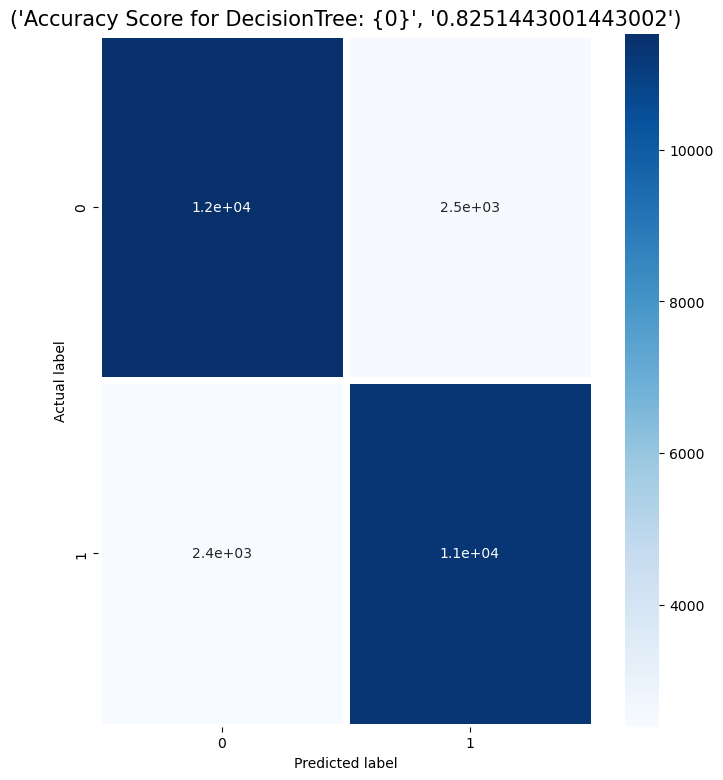

In [40]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,9))
sns.heatmap(data=cm, linewidths= 5, annot=True, cmap ="Blues")
plt.ylabel( "Actual label")
plt.xlabel( "Predicted label")
plt.title("Bar Chart of DecisionTreeClassifier Coefficients as Feature Importance Scores")
all_sample_title ="Accuracy Score for DecisionTree: {0}",format(dtree.score(X_test,y_test))
plt.title(all_sample_title, size = 15)
plt.show()

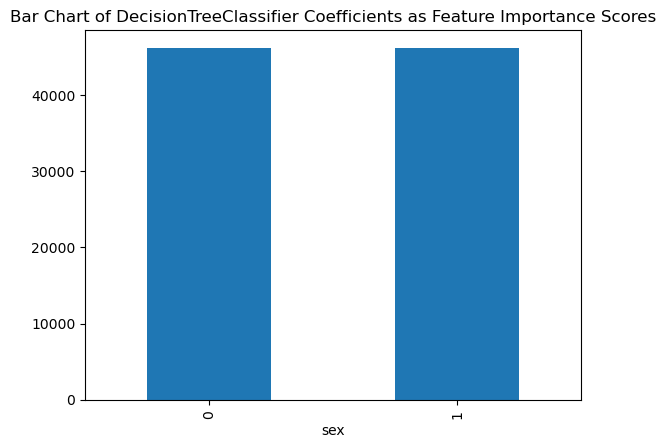

In [41]:
# visualize model
importance = dtree.feature_importances_
df["sex"].value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Bar Chart of DecisionTreeClassifier Coefficients as Feature Importance Scores")
plt.show()

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2,random_state=0)
rfc = rfc.fit(X_train, y_train)

In [43]:
# Perform a grid search with cross-validation to find the best hyperparameter

rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features= "sqrt", n_estimators=100, class_weight="balanced")
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
rfc =RandomForestClassifier(random_state=42)
# fit the model

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
 

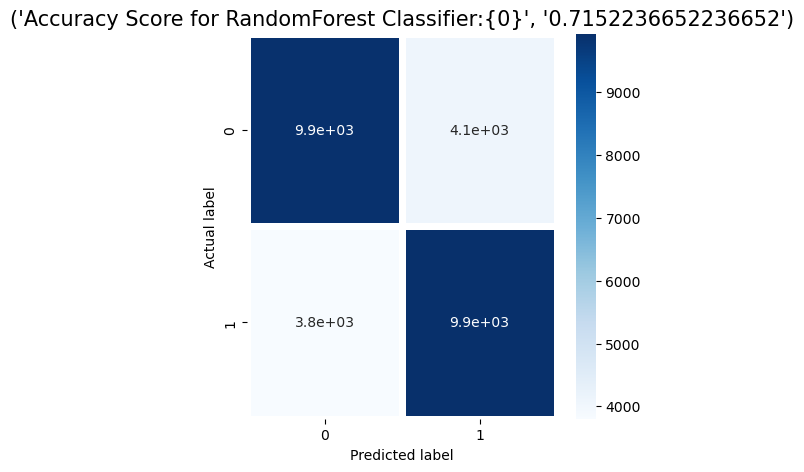

In [45]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths= 5, annot=True, cmap ="Blues")
plt.ylabel( "Actual label")
plt.xlabel( "Predicted label")
plt.title("Bar Chart of RandomForest Classifier Coefficients as Feature Importance Scores")
all_sample_title ="Accuracy Score for RandomForest Classifier:{0}",format(rfc.score(X_test,y_test))
plt.title(all_sample_title, size = 15)
plt.show()

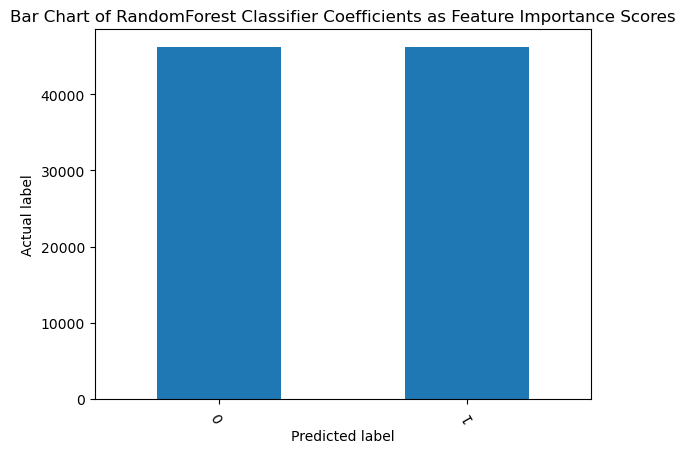

In [46]:
# visualize model
importance = dtree.feature_importances_
df["sex"].value_counts().plot(kind="bar")
plt.ylabel( "Actual label")
plt.xlabel( "Predicted label")
plt.title("Bar Chart of RandomForest Classifier Coefficients as Feature Importance Scores")
plt.xticks(rotation=120)
plt.show()

# k-Nearest Neighbors (KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score

knn = KNeighborsClassifier (n_neighbors=5)
knn.fit (X_train , y_train)
y_pred =knn.predict (X_test)

acc_score = accuracy_score(y_test, y_pred)
print("KNN_accuracy_score :", acc_score)

pre_score = precision_score(y_test, y_pred, average='macro')
print("KNN_precision_score:",pre_score)

rec_score = recall_score(y_test, y_pred , average='macro')
print("KNN_recall_score :", rec_score)

KNN_accuracy_score : 0.5863636363636363
KNN_precision_score: 0.5863112528853012
KNN_recall_score : 0.5862945229680903


In [48]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


<Figure size 640x480 with 0 Axes>

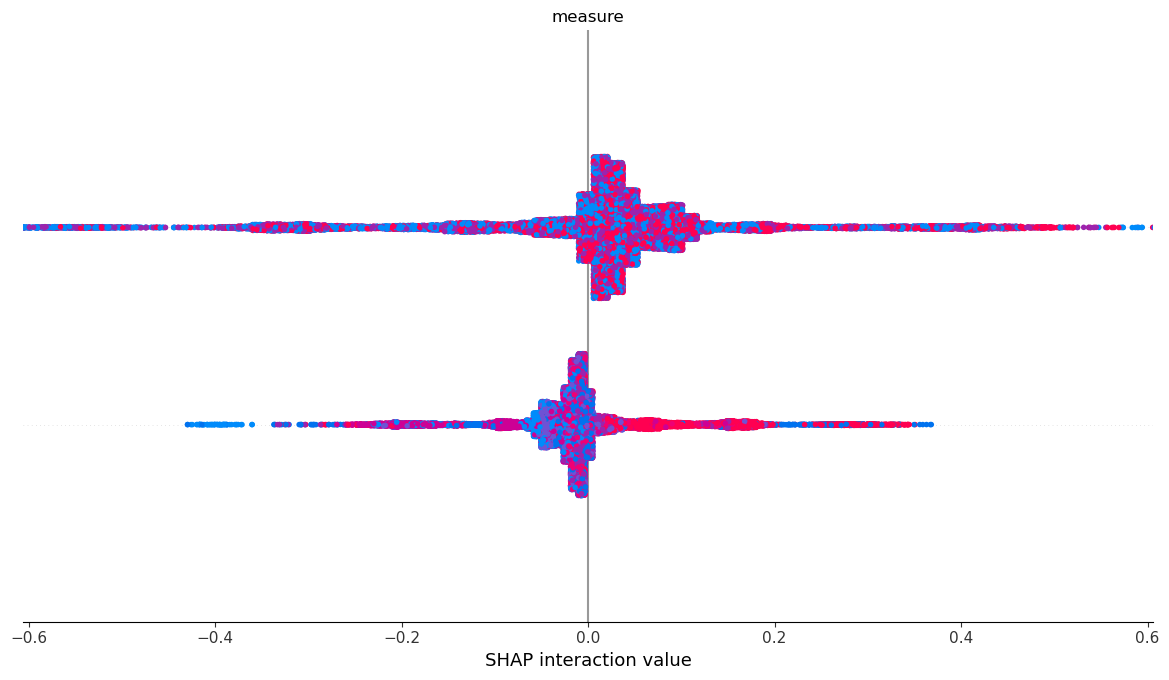

In [49]:
# show model Explainer
import shap
explainer = shap.TreeExplainer (dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

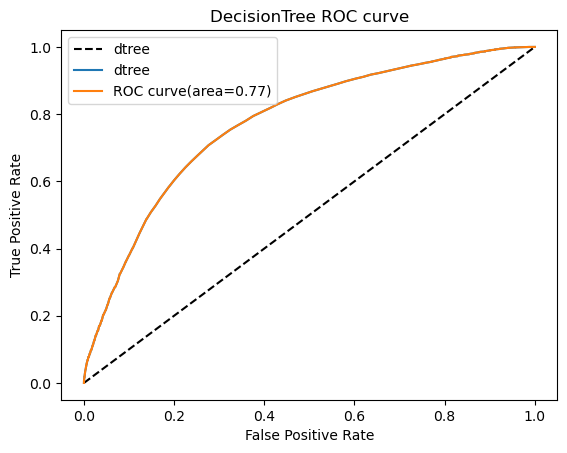

In [50]:
from sklearn.metrics import roc_curve, auc
#predict using predict_proba
y_pred_proba=rfc.predict_proba(X_test)[:][:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)
# now draw ROC using fpr,tpr
plt.plot([0,1],[0,1],"k--", label="dtree")
plt.plot(fpr,tpr,label="dtree")
plt.plot(fpr,tpr,label="ROC curve(area=%0.2f)"%roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DecisionTree ROC curve")
plt.legend(loc="best")
plt.show()

In [51]:
import pandas as pd
from scipy import stats
df = pd.read_csv("New-Zealand-and-district-health-board-period-life-tables-2017-2019-by-NZDep2018-CSV (1).csv")
df.head(1)

,measure,quantile,NZDep2018,sex,age,area,geography,value
0,lx,2.50%,decile_1,Female,0 years,00 New Zealand,New Zealand,100000.0


# Unsupervised Learning Models

# Kmeans models for PCA

In [52]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [53]:
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [54]:
# Apply PCA for dimensionality reduction
pca = PCA (n_components=0.95)   # Keep 95% of variance
X_pca = pca.fit_transform(X_train_scaled)

In [55]:
# Find optimal number of clusters using elbow method
def find_optimal_k_elbow_pca (X , max_k =10) :
    inertias = []
    silhouette_scores = []

    for k in range (2 , max_k + 1) :
        kmeans = KMeans ( n_clusters =k , random_state =42)
        cluster_labels = kmeans . fit_predict ( X )
        inertias . append ( kmeans . inertia_ )
        silhouette_scores . append ( silhouette_score (X , cluster_labels ) )
         
    optimal_k = range (2 , max_k + 1) [ np . argmax ( silhouette_scores ) ]
    print (f" Optimal number of clusters : { optimal_k }")
    print ( f" Best silhouette score : {max( silhouette_scores ):.4f}")
    return optimal_k

optimal_k = find_optimal_k_elbow_pca (X_pca)
kmeans_pca = KMeans (n_clusters = optimal_k , random_state =42)
cluster_labels = kmeans_pca . fit_predict (X_pca)

 Optimal number of clusters : 5
 Best silhouette score : 0.2514


In [56]:
# Analyze clusters in relation to churn
cluster_df = pd . DataFrame ({
     'cluster': cluster_labels ,
     'sex': y_train_balanced
 })

cluster_Gender_analysis = cluster_df . groupby ('cluster') ['sex']. agg ([ 'count', 'mean'
    ]) . round (4)
print (" Cluster Analysis :")
print ( cluster_Gender_analysis )


 Cluster Analysis :
         count    mean
cluster               
0        16888  0.5015
1        17658  0.5005
2         5871  0.5032
3         7355  0.4882
4        17162  0.5020


# Isolation Forest for Anomaly Detection

In [57]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest (contamination=0.1, random_state=42, n_estimators
    =100)
anomaly_labels = iso_forest.fit_predict (X)

In [58]:
# Convert to binary (1 for anomaly , 0 for normal)
anomaly_labels = np.where(anomaly_labels == 1, 0, 1)

print (f"Number of anonalies detected: {sum(anomaly_labels)}")
print (f"Percentage of anomalies: {sum(anomaly_labels)/len(anomaly_labels)
    *100:.2f}%")

Number of anonalies detected: 9240
Percentage of anomalies: 10.00%


In [59]:
print(f"Length of anomaly_labels: {len(anomaly_labels)}")
print(f"Length of y_train_balanced: {len(y_train_balanced)}")

Length of anomaly_labels: 92400
Length of y_train_balanced: 64934


In [60]:
# Analyze relationship between anomalies and churn
min_len = min(len(anomaly_labels), len(y_train_balanced))

anomaly_df = pd.DataFrame({
    'anomaly': anomaly_labels[:min_len],
    'sex': y_train_balanced[:min_len]
})


anomaly_analysis = anomaly_df.groupby('anomaly')['sex'].agg(['count', 'mean']).round(4)
print("Anomaly Analysis:")
print(anomaly_analysis)

Anomaly Analysis:
         count    mean
anomaly               
0        55696  0.5002
1         9238  0.4990


# Deep Learning Models
Multi-Layer Perception (MLP)

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCaV

In [62]:
from sklearn.neural_network import MLPClassifier
print(MLPClassifier().get_params().keys())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [63]:
# Grid search for MLP hyperparameters
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPClassifier ( random_state =42, max_iter =1000)
mlp_grid_search = GridSearchCV ( mlp, mlp_param_grid, cv =3, scoring ='accuracy',
n_jobs = -1)
mlp_grid_search . fit ( X_train_scaled, y_train_balanced )

print (" Best MLP parameters :")
print ( mlp_grid_search . best_params_ )
print ( f" Best MLP score : { mlp_grid_search . best_score_ :.4f}")
from sklearn.neural_network import MLPClassifier
print(MLPClassifier().get_params().keys())

best_mlp = mlp_grid_search . best_estimator_
y_pred_mlp = best_mlp . predict ( X_test_scaled )

 Best MLP parameters :
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
 Best MLP score : 0.5762
dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [64]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix

In [65]:
# MLP Evaluation
from sklearn.neural_network import MLPRegressor
mlp_acc = accuracy_score ( y_test , y_pred )
mlp_precision = precision_score ( y_test , y_pred )
mlp_recall = recall_score ( y_test , y_pred )

print ( f" MLP Results :")
print ( f" accuracy_score : { mlp_acc :.3f}")
print ( f" precision_score : { mlp_precision :.3f}")
print ( f" recall_score : { mlp_recall :.3f}")

 MLP Results :
 accuracy_score : 0.586
 precision_score : 0.583
 recall_score : 0.579


# TensorFlow Neural Network
A deep neural network is implemented using TensorFlow with batch normalization and dropout:

In [66]:
pip install tensorflow

In [67]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
def create_tensorflow_model (input_dim):
    model = Sequential ([
        Dense (128 , activation= 'relu', input_shape= (input_dim , )) ,
        BatchNormalization () ,
        Dropout (0.3) ,

        Dense (64 , activation= 'relu') ,
        BatchNormalization () ,
        Dropout (0.3) ,

        Dense (32, activation= 'relu') ,
        Dropout (0.2) ,

        Dense (1, activation= 'sigmoid')
    ])

    model.compile (optimizer=Adam(learning_rate=0.001) ,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    return model

In [69]:
# Create and train model
tf_model = create_tensorflow_model ( X_train_scaled . shape [1])
early_stopping = EarlyStopping ( monitor='val_loss', patience=10 ,
    restore_best_weights = True )

history = tf_model . fit (
     X_train , y_train ,
     validation_split =0.2 ,
     epochs =100 ,
     batch_size =32 ,
     callbacks =[ early_stopping ] ,
     verbose =1
 )

C:\Users\DELL\anaconda4\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5001 - loss: 0.7526 - val_accuracy: 0.4962 - val_loss: 0.6940
Epoch 2/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4988 - loss: 0.6961 - val_accuracy: 0.5011 - val_loss: 0.6933
Epoch 3/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5068 - loss: 0.6938 - val_accuracy: 0.4939 - val_loss: 0.6932
Epoch 4/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5060 - loss: 0.6934 - val_accuracy: 0.4937 - val_loss: 0.6933
Epoch 5/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.5066 - val_loss: 0.6932
Epoch 6/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5031 - loss: 0.6936 - val_accuracy: 0.4964 - val_loss: 0.6935
Epoch 7/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.4982 - val_loss: 0.6935
Epoch 8/100
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5013 -

In [70]:
# TensorFlow Evaluation
X_test_tf = X_test_scaled # or appropriate preprocessing

y_pred_tf_prob = tf_model.predict(X_test_tf)
y_pred_tf = (y_pred_tf_prob > 0.5).astype(int).flatten()

y_test_tf = y_test  # if not defined yet

tf_acc = accuracy_score(y_test_tf, y_pred_tf)
tf_precision = precision_score(y_test_tf, y_pred_tf)
tf_recall = recall_score(y_test_tf, y_pred_tf)

print ( f" TensorFlow Results :")
print ( f" accuracy_score : { tf_acc :.3f}")
print ( f" precision_score : { tf_precision :.3f}")
print ( f" recall_score : { tf_recall :.3f}")
print(type(X_test_tf), X_test_tf.shape)

867/867 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
 TensorFlow Results :
 accuracy_score : 0.495
 precision_score : 0.495
 recall_score : 1.000
<class 'numpy.ndarray'> (27720, 7)


# Final Model Comparison and Business Insights
Comprehensive Model Comparison

In [71]:
# create comparison dataframe\
model_comparison = pd.DataFrame({
    'Model': ['Multi-layer Perceptron', 'TensorFlow Neural Network'],
    'Accuracy': [mlp_acc, tf_acc],
    'Precision': [mlp_precision, tf_precision],
    'Recall': [mlp_recall, tf_recall]
})

print("Model Performance Comparison:")
print(model_comparison.round(4))

best_model = "MLP" if mlp_acc > tf_acc else "TensorFlow"
print(f"Best performing model: {best_model}")

Model Performance Comparison:
                       Model  Accuracy  Precision  Recall
0     Multi-layer Perceptron    0.5864     0.5832  0.5788
1  TensorFlow Neural Network    0.4954     0.4954  1.0000
Best performing model: MLP


# Visualization Code

In [72]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model ': ['Model A', 'Model B', 'Model C'],
    'Accuracy ': [0.90, 0.85, 0.88]
})


In [73]:
print(model_comparison.columns.tolist())

['Model ', 'Accuracy ']


In [74]:
, model_comparison['Precision'])

"model_comparison['Precision'])"

In [75]:
print(model_comparison.head())
print(model_comparison.columns.tolist())

    Model   Accuracy 
0  Model A       0.90
1  Model B       0.85
2  Model C       0.88
['Model ', 'Accuracy ']


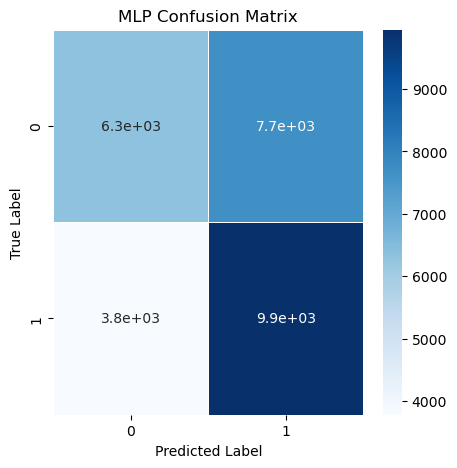

In [76]:
##### from sklearn.metrics import confusion_matrix

# Predict using the best MLP model from GridSearchCV
y_pred_mlp = mlp_grid_search.predict(X_test_scaled)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(5, 5))
sns.heatmap(data=cm_mlp, linewidths=.5, annot=True, cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()